In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from datetime import date
from sklearn.metrics import mean_absolute_percentage_error
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\Administrator\\Downloads\\BIDV.csv')
df = df[['Price']]
df

,Price
0,11054.8
1,10574.2
2,9973.4
3,10213.7
4,10153.6
...,...
2467,41000.0
2468,41200.0
2469,41300.0
2470,41800.0


In [3]:
df['Target'] = df.Price.shift(-1)
df.dropna(inplace = True)
df.head()

,Price,Target
0,11054.8,10574.2
1,10574.2,9973.4
2,9973.4,10213.7
3,10213.7,10153.6
4,10153.6,10093.5


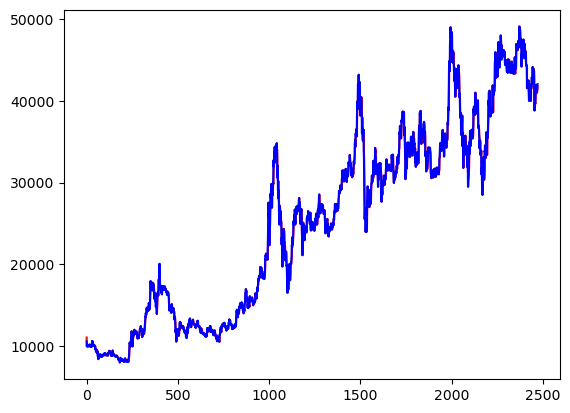

In [4]:
# gán biến
X = df[['Price']]
y = df[['Target']] # các biến độc lập

plt.plot(X, color = 'r')
plt.plot(y, color = 'b')
plt.show()

In [5]:
# chia train, test
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

In [6]:
# tạo mô hình SVR
svr_rbf = SVR(kernel='rbf', C=1000)
svr_rbf.fit(X_train, y_train)

svr_poly = SVR(kernel='poly', C=1000, degree = 2)
svr_poly.fit(X_train, y_train)

SVR(C=1000, degree=2, kernel='poly')

In [7]:
# dự đoán giá đóng cửa trên tập kiểm tra
y_pred_rbf = svr_rbf.predict(X_test)
y_pred_rbf = y_pred_rbf.reshape(-1,1)

y_pred_poly = svr_poly.predict(X_test)
y_pred_poly = y_pred_poly.reshape(-1,1)

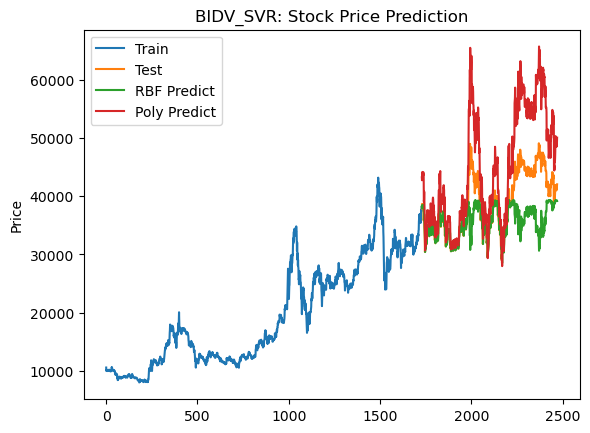

In [8]:
#vẽ mô hình
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(X_test.index, y_pred_poly, label='Poly Predict')

plt.ylabel('Price')
plt.legend()
plt.title('BIDV_SVR: Stock Price Prediction')
plt.show()

In [9]:
# lấy giá trị Close của ngày cuối cùng trong dataset
last_row = df.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[41800.]])

In [10]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_days_rbf = []
x_next_30_days_poly = []
# predict giá Close 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_days_rbf.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_days_poly.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

print("Kết quả dự đoán sử dụng RBF:", x_next_30_days_rbf)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_days_poly)

Kết quả dự đoán sử dụng RBF: [array([39180.5781649]), array([38810.39060358]), array([38594.14424141]), array([38452.72536855]), array([38354.62907428]), array([38284.09856087]), array([38232.17199423]), array([38193.30843976]), array([38163.87661294]), array([38141.3937766]), array([38124.10795719]), array([38110.75284928]), array([38100.39619419]), array([38092.34183976]), array([38086.06417899]), array([38081.16294639]), array([38077.3312773]), array([38074.33267649]), array([38071.98413168]), array([38070.14356237]), array([38068.70038683]), array([38067.56836856]), array([38066.68015216]), array([38065.98306531]), array([38065.43587853]), array([38065.00629511]), array([38064.66900078]), array([38064.40414495]), array([38064.19615585]), array([38064.03281469])]
Kết quả dự đoán sử dụng Poly: [array([38063.90453156]), array([38063.8037785]), array([38063.72464533]), array([38063.66249148]), array([38063.61367296]), array([38063.57532812]), array([38063.5452096]), array([38063.521552

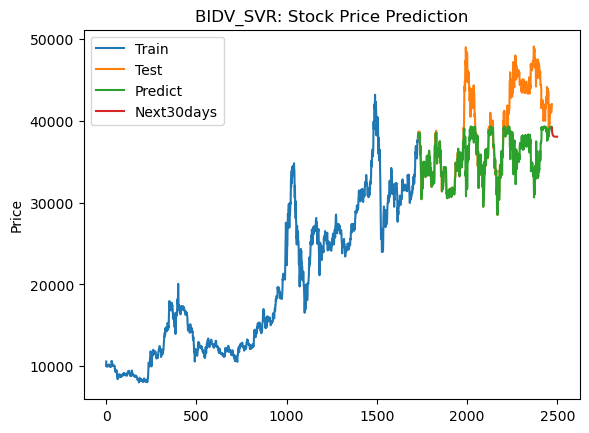

In [11]:
#vẽ mô hình

plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, y_pred_rbf, label='Predict')

last_date = pd.to_datetime(X_test.index[1])  # Convert last index to datetime

next_dates = np.arange(2470, 2500)

plt.plot(next_dates, x_next_30_days_rbf, label='Next30days')

plt.ylabel('Price')
plt.title('BIDV_SVR: Stock Price Prediction')
plt.legend()
plt.show()


In [12]:
# tính toán độ chính xác của mô hình
from sklearn.metrics import mean_squared_log_error

mape_rbf = mean_absolute_percentage_error(y_test, y_pred_rbf) * 100
msle_rbf = mean_squared_log_error(y_test, y_pred_rbf)
test_rmse_rbf = np.sqrt(np.mean((y_pred_rbf - y_test)**2))

mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly) * 100
msle_poly = mean_squared_log_error(y_test, y_pred_poly)
test_rmse_poly = np.sqrt(np.mean((y_pred_poly - y_test)**2))

print("RBF MAPE:", mape_rbf)
print("RBF MSLE: ",  msle_rbf)
print("RBF Testing RMSE:", test_rmse_rbf)

print("Poly MAPE:", mape_poly)
print("Poly MSLE:",  msle_poly)
print("Poly Testing RMSE:", test_rmse_poly)

RBF MAPE: 7.754987330491976
RBF MSLE:  0.01883603558578242
RBF Testing RMSE: 5500.535620052271
Poly MAPE: 14.762201966385394
Poly MSLE: 0.024916535036348445
Poly Testing RMSE: 7679.822697615948
